Traffic Dataset Statistics:
              hour  day_of_week  traffic_volume
count  240.000000   240.000000      240.000000
mean    11.500000     5.500000      275.137500
std      6.936653     2.878284      126.988624
min      0.000000     1.000000       51.000000
25%      5.750000     3.000000      170.750000
50%     11.500000     5.500000      280.000000
75%     17.250000     8.000000      381.750000
max     23.000000    10.000000      498.000000

Mining Dataset Statistics:
        temperature    pressure    humidity  quality_score
count   200.000000  200.000000  200.000000     200.000000
mean     49.856247    5.810240   57.394726      74.113700
std      17.407605    2.802775   16.503066      14.407571
min      20.303695    1.097539   30.872680      50.231601
25%      34.807739    3.537907   42.309427      61.404488
50%      51.556815    6.012262   56.298295      73.351819
75%      63.559376    8.325670   70.162543      86.290563
max      79.403231    9.997459   89.397614      99.8437

c:\Users\sasan\Programming\My Projects\Internship\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sasan\Programming\My Projects\Internship\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


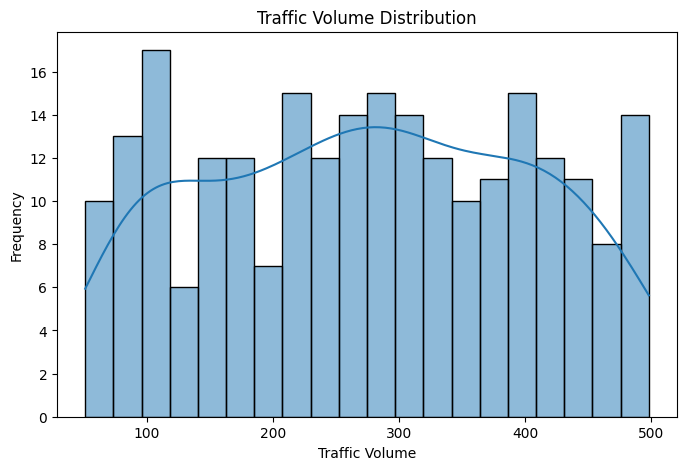

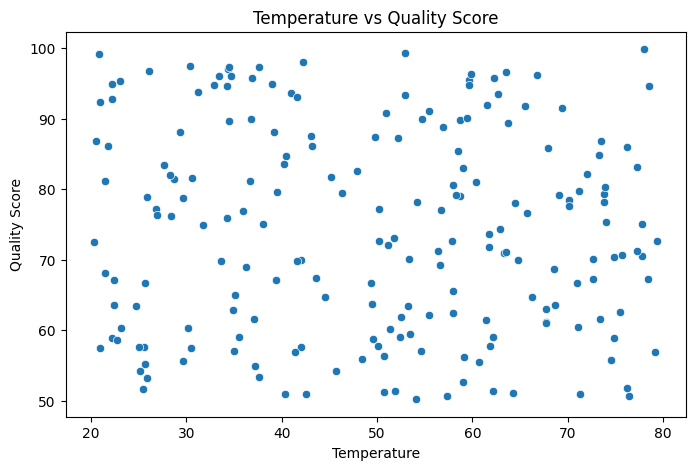

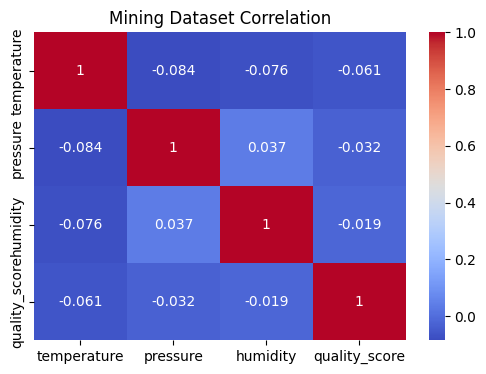

In [5]:
# Project: Smart City Traffic Forecasting & Mining Quality Prediction
# Author: Kodamarthy Sasasnk
# Description: Basic Python project demonstrating statistics, probability, visualization, and simple ML.

# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------
# 1. Simulated Datasets
# -------------------------

# Traffic Dataset Simulation
np.random.seed(42)
traffic_data = pd.DataFrame({
    'hour': np.tile(np.arange(0, 24), 10),
    'day_of_week': np.repeat(np.arange(1, 11), 24),
    'traffic_volume': np.random.randint(50, 500, size=240)
})

# Mining Dataset Simulation
mining_data = pd.DataFrame({
    'temperature': np.random.uniform(20, 80, 200),
    'pressure': np.random.uniform(1, 10, 200),
    'humidity': np.random.uniform(30, 90, 200),
    'quality_score': np.random.uniform(50, 100, 200)
})

# -------------------------
# 2. Basic Statistics
# -------------------------

# Traffic Data Stats
print("Traffic Dataset Statistics:\n", traffic_data.describe())

# Mining Data Stats
print("\nMining Dataset Statistics:\n", mining_data.describe())

# -------------------------
# 3. Visualizations
# -------------------------
import os
os.makedirs('../outputs', exist_ok=True)

# Traffic Histogram
plt.figure(figsize=(8,5))
sns.histplot(traffic_data['traffic_volume'], bins=20, kde=True)
plt.title("Traffic Volume Distribution")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.savefig('../outputs/traffic_histogram.png')


# Mining Quality Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='temperature', y='quality_score', data=mining_data)
plt.title("Temperature vs Quality Score")
plt.xlabel("Temperature")
plt.ylabel("Quality Score")
plt.savefig('../outputs/mining_scatter.png')


# Correlation Heatmap for Mining Dataset
plt.figure(figsize=(6,4))
sns.heatmap(mining_data.corr(), annot=True, cmap='coolwarm')
plt.title("Mining Dataset Correlation")
plt.savefig('../outputs/mining_correlation.png')


# -------------------------
# 4. Probability Examples
# -------------------------

# Traffic > 400 probability
prob_high_traffic = (traffic_data['traffic_volume'] > 400).mean()
print(f"Probability of traffic volume > 400: {prob_high_traffic:.2f}")

# Mining quality < 60 probability
prob_low_quality = (mining_data['quality_score'] < 60).mean()
print(f"Probability of mining quality score < 60: {prob_low_quality:.2f}")

# -------------------------
# 5. Machine Learning Models
# -------------------------

# --- Traffic Forecasting ---
X_traffic = traffic_data[['hour', 'day_of_week']]
y_traffic = traffic_data['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X_traffic, y_traffic, test_size=0.2, random_state=42)

traffic_model = LinearRegression()
traffic_model.fit(X_train, y_train)
y_pred_traffic = traffic_model.predict(X_test)

print("\nTraffic Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_traffic))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_traffic)))
print("R2 Score:", r2_score(y_test, y_pred_traffic))

# --- Mining Quality Prediction ---
X_mining = mining_data[['temperature', 'pressure', 'humidity']]
y_mining = mining_data['quality_score']

X_train, X_test, y_train, y_test = train_test_split(X_mining, y_mining, test_size=0.2, random_state=42)

mining_model = DecisionTreeRegressor(random_state=42)
mining_model.fit(X_train, y_train)
y_pred_mining = mining_model.predict(X_test)

print("\nMining Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_mining))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mining)))
print("R2 Score:", r2_score(y_test, y_pred_mining))

# -------------------------
# 6. Predictions Example
# -------------------------
# Predict traffic at hour=9, day_of_week=3
sample_traffic = np.array([[9, 3]])
predicted_traffic = traffic_model.predict(sample_traffic)
print(f"\nPredicted traffic volume at 9 AM on day 3: {predicted_traffic[0]:.2f}")

# Predict mining quality for temperature=50, pressure=5, humidity=60
sample_mining = np.array([[50, 5, 60]])
predicted_quality = mining_model.predict(sample_mining)
print(f"Predicted mining quality score: {predicted_quality[0]:.2f}")

# Directory to save output plots

